In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D
from matplotlib import pyplot as plt
import skimage

Using TensorFlow backend.


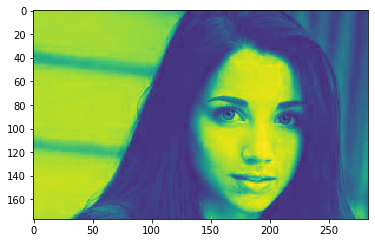

In [6]:
#load image
input_shape = (177, 284, 1)
img = np.zeros((1, input_shape[0], input_shape[1], 1))
img[0,:,:,0]=skimage.io.imread('photo.jpeg')[:,:,0]
plt.imshow(np.squeeze(img))
plt.show()

### 1. Blurring Convolution

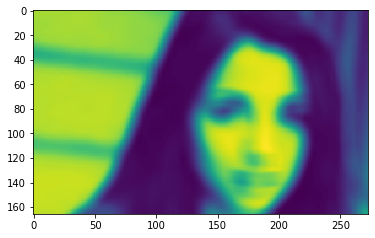

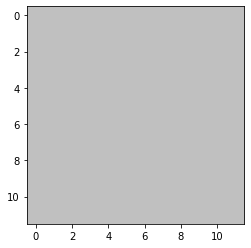

In [50]:
n = 12
model = Sequential()
model.add(Convolution2D(1, n, padding='valid', input_shape=input_shape))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
W = model.layers[0].get_weights()
W[0].fill(1)
model.layers[0].set_weights(W)

img2 = model.predict(img)
plt.imshow(np.squeeze(img2))
plt.show()
plt.imshow(np.squeeze(W[0]), cmap='gray', vmin=-2, vmax=2)
plt.show()

### Invert Colors

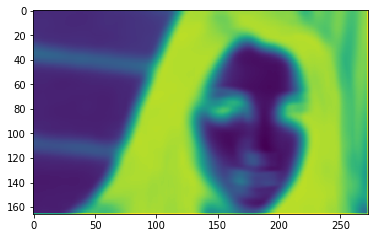

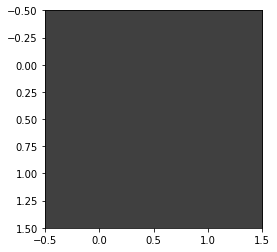

In [49]:
model = Sequential()
model.add(Convolution2D(1, 2, padding='same', input_shape=(img2.shape[1], img2.shape[2], 1)))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
W = model.layers[0].get_weights()
W[0].fill(-1)
model.layers[0].set_weights(W)

img3 = model.predict(img2)
plt.imshow(np.squeeze(img3))
plt.show()
plt.imshow(np.squeeze(W[0]), cmap='gray', vmin=-2, vmax=2)
plt.show()

### Crop

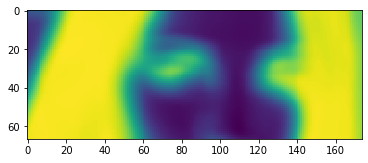

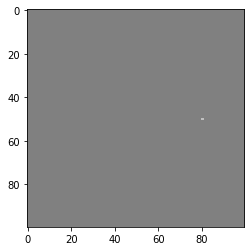

In [51]:
model = Sequential()
model.add(Convolution2D(1, 100, padding='valid', input_shape=(img3.shape[1], img3.shape[2], 1)))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
W = model.layers[0].get_weights()
W[0].fill(0)
W[0][50][80]=1
model.layers[0].set_weights(W)

img4 = model.predict(img3)
plt.imshow(np.squeeze(img4))
plt.show()
plt.imshow(np.squeeze(W[0]), cmap='gray', vmin=-2, vmax=2)
plt.show()

### Find pattern

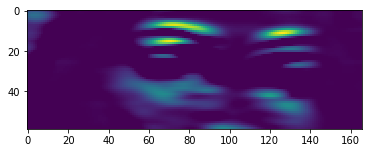

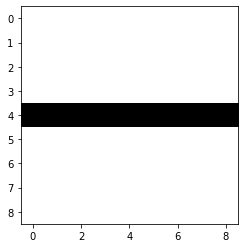

In [69]:
model = Sequential()
model.add(Convolution2D(1, 9, padding='valid', activation='relu', input_shape=(img4.shape[1], img4.shape[2], 1)))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
W = model.layers[0].get_weights()

W[0].fill(2)
W[0][4][:].fill(-16)
model.layers[0].set_weights(W)

img5 = model.predict(img4)
plt.imshow(np.squeeze(img5))
plt.show()
plt.imshow(np.squeeze(W[0]), cmap='gray', vmin=-2, vmax=2)
plt.show()